In [3]:
import json

# Path to the original JSON file
original_file_path = 'nzfl-testing-2-default-rtdb-export.json'

# Path to the new JSON file without 'thermal_camera'
new_file_path = 'new.json'

# Read the original JSON file
with open(original_file_path, 'r') as file:
    data = json.load(file)

# Iterate over the device data and remove 'thermal_camera' key
for device_key, device_data in data.items():
    for datetime_key, datetime_data in device_data.items():
        if 'thermal_camera' in datetime_data:
            del datetime_data['thermal_camera']
        if 'device_01' in datetime_data:
            del datetime_data['device_01']

# Write the modified JSON data to a new file
with open(new_file_path, 'w') as file:
    json.dump(data, file, indent=4)  # You can use indent for pretty formatting, if needed

print(f"'thermal_camera' key and 'device_01' key removed. New JSON file saved as '{new_file_path}'")


'thermal_camera' key and 'device_01' key removed. New JSON file saved as 'new.json'


In [22]:
from datetime import datetime, timezone

# Timestamp in milliseconds
timestamp = 1709885098

# Convert timestamp to seconds
timestamp_seconds = timestamp 

# Convert timestamp to datetime object in UTC timezone
dt_object = datetime.fromtimestamp(timestamp_seconds, timezone.utc)

# Format datetime object to display the date and time in the year 2024
formatted_date_time = dt_object.replace(year=2024).strftime('%Y-%m-%d %H:%M:%S')

print(f"The timestamp {timestamp} milliseconds corresponds to the date and time: {formatted_date_time}")


The timestamp 1709885098 milliseconds corresponds to the date and time: 2024-03-08 08:04:58


In [18]:
def get_lengths(data, level=1):
    lengths = {level: len(data)}
    if isinstance(data, dict):
        for key, value in data.items():
            if isinstance(value, (dict, list)):
                sub_lengths = get_lengths(value, level + 1)
                for sub_level, sub_length in sub_lengths.items():
                    lengths[sub_level] = lengths.get(sub_level, 0) + sub_length
    elif isinstance(data, list):
        for item in data:
            if isinstance(item, (dict, list)):
                sub_lengths = get_lengths(item, level + 1)
                for sub_level, sub_length in sub_lengths.items():
                    lengths[sub_level] = lengths.get(sub_level, 0) + sub_length
    return lengths



lengths = get_lengths(data)

for level, length in lengths.items():
    print(f"Level {level}: {length}")


Level 1: 1
Level 2: 4012
Level 3: 24072


In [43]:
from datetime import datetime

def convert_seconds_to_datetime(seconds):
    # Convert seconds to a datetime variable for the year 2024
    datetime_object = datetime.fromtimestamp(seconds, timezone.utc)
    datetime_object_2024 = datetime_object.replace(year=2024)
    return datetime_object_2024

# Example usage
seconds = 1709885098  # Replace this with your seconds value
datetime_2024 = convert_seconds_to_datetime(seconds)
print(f"DateTime for the year 2024: {datetime_2024}")



DateTime for the year 2024: 2024-03-08 08:04:58+00:00



1709884468: 2024-01-20 18:58:04      2024-03-08 07:54:28   
1709885098 : 2024-01-20 18:58:05     2024-03-08 08:04:58

1712797657: 2024-01-20 19:46:37
1712798288: 2024-01-20 19:46:38


1712798919:2024-01-20 19:46:38
1712799549:2024-01-20 19:46:39


            "hcho_sensor": 4.41,
            "light_sensor": 1,
            "tvoc_sensor_co2": 1027,
            "tvoc_sensor_rh": 59.3,
            "tvoc_sensor_temperature": 25.5,
            "tvoc_sensor_tvoc": 1105    

In [47]:
sensor_name_dict = {
'hcoh': 'hcho_sensor',
 'lit': 'light_sensor',
 'co2': 'tvoc_sensor_co2',
 'rh': 'tvoc_sensor_rh',
 'temp': 'tvoc_sensor_temperature',
 'tvoc': 'tvoc_sensor_tvoc'
 }



2024-03-08 07:21:55+00:00
441.9166666666667
4.26
2024-03-08 07:43:57+00:00
463.95
4.32
2024-03-08 07:54:28+00:00
474.46666666666664
4.23
2024-03-08 08:04:58+00:00
484.96666666666664
4.38
2024-03-08 08:15:29+00:00
495.48333333333335
4.23
2024-03-08 08:26:00+00:00
506.0
4.37
2024-03-08 08:36:31+00:00
516.5166666666667
4.38
2024-03-08 08:47:01+00:00
527.0166666666667
4.38
2024-03-08 08:57:32+00:00
537.5333333333333
4.37
2024-03-08 09:08:02+00:00
548.0333333333333
4.38
2024-03-08 09:18:33+00:00
558.55
4.38
2024-03-08 09:29:04+00:00
569.0666666666667
4.38
2024-03-08 09:39:35+00:00
579.5833333333334
4.32
2024-03-08 09:50:05+00:00
590.0833333333334
4.21
2024-03-08 10:00:36+00:00
600.6
4.32
2024-03-08 10:11:07+00:00
611.1166666666667
4.21
2024-03-08 10:21:38+00:00
621.6333333333333
4.24
2024-03-08 10:32:08+00:00
632.1333333333333
4.37
2024-03-08 10:42:39+00:00
642.65
4.29
2024-03-08 10:53:10+00:00
653.1666666666666
4.27
2024-03-08 11:03:41+00:00
663.6833333333333
4.17
2024-03-08 11:14:11+00:00

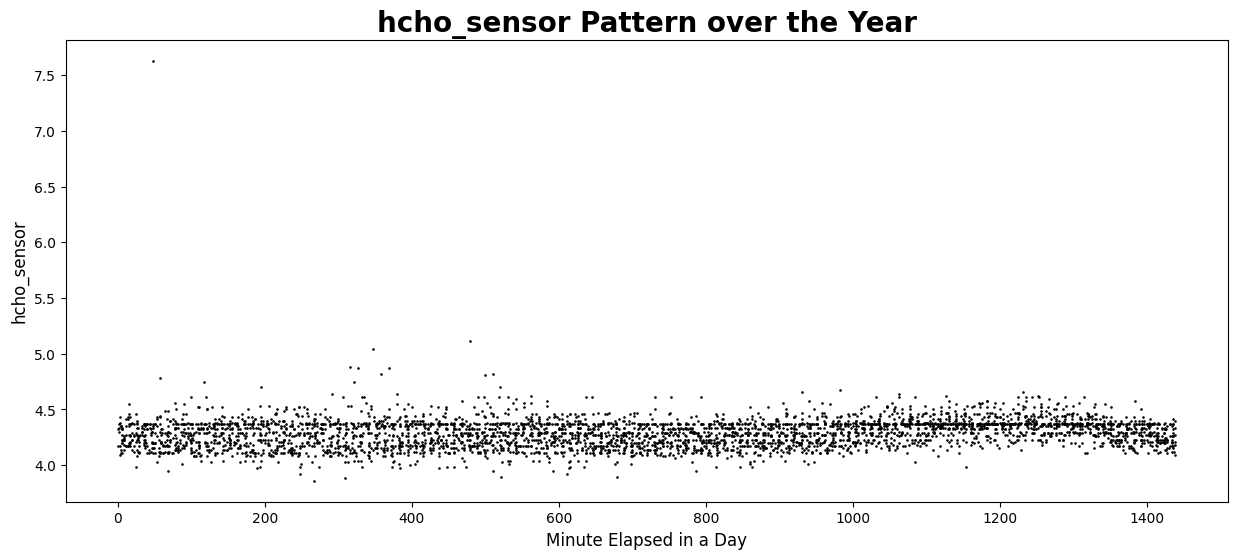

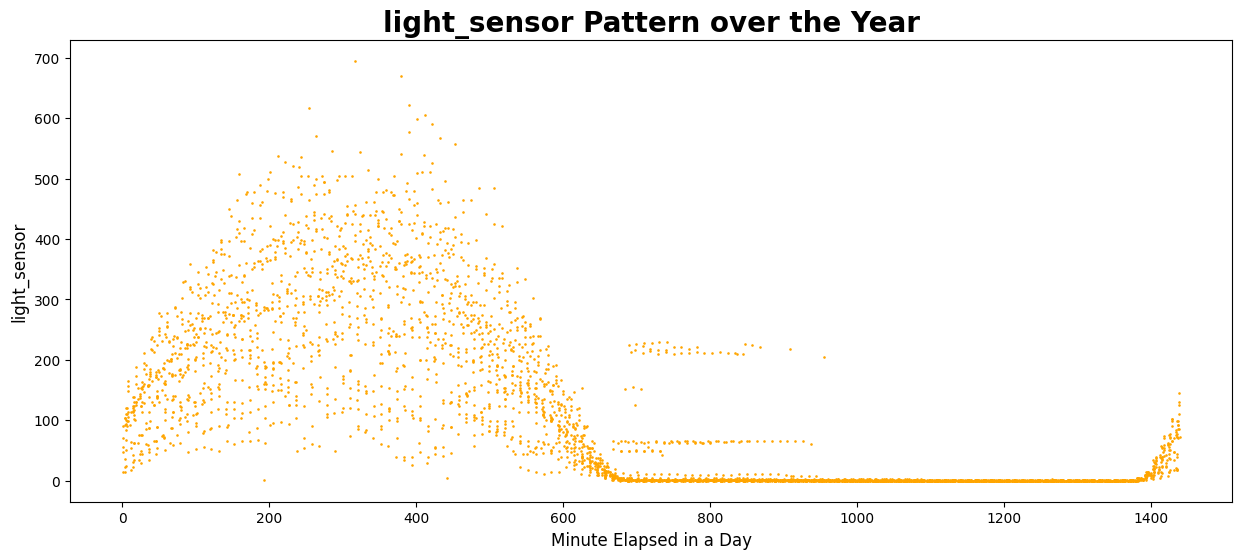

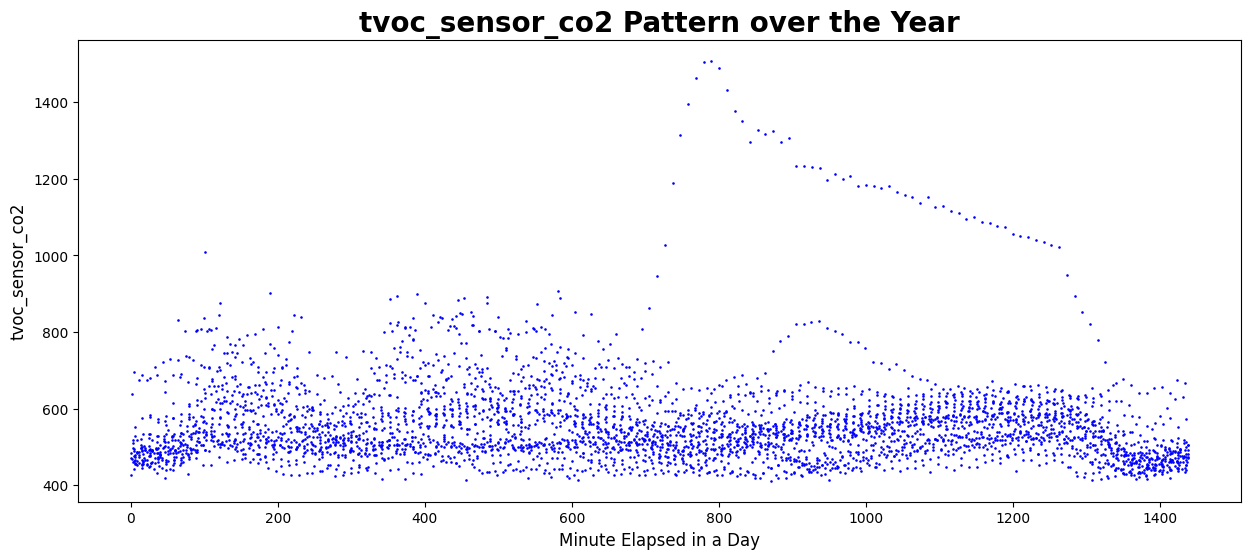

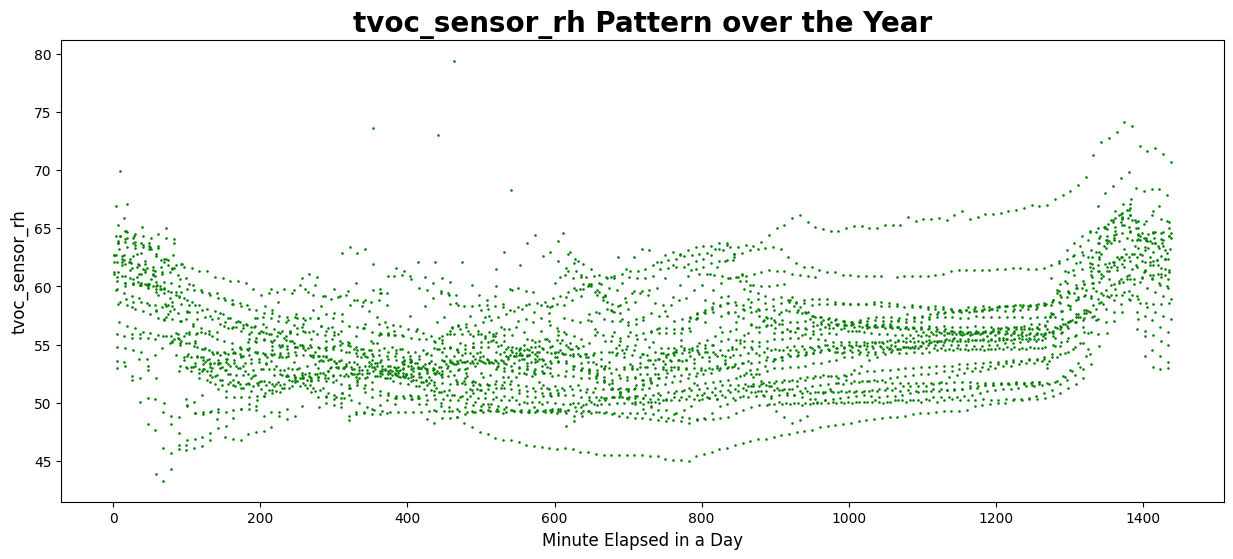

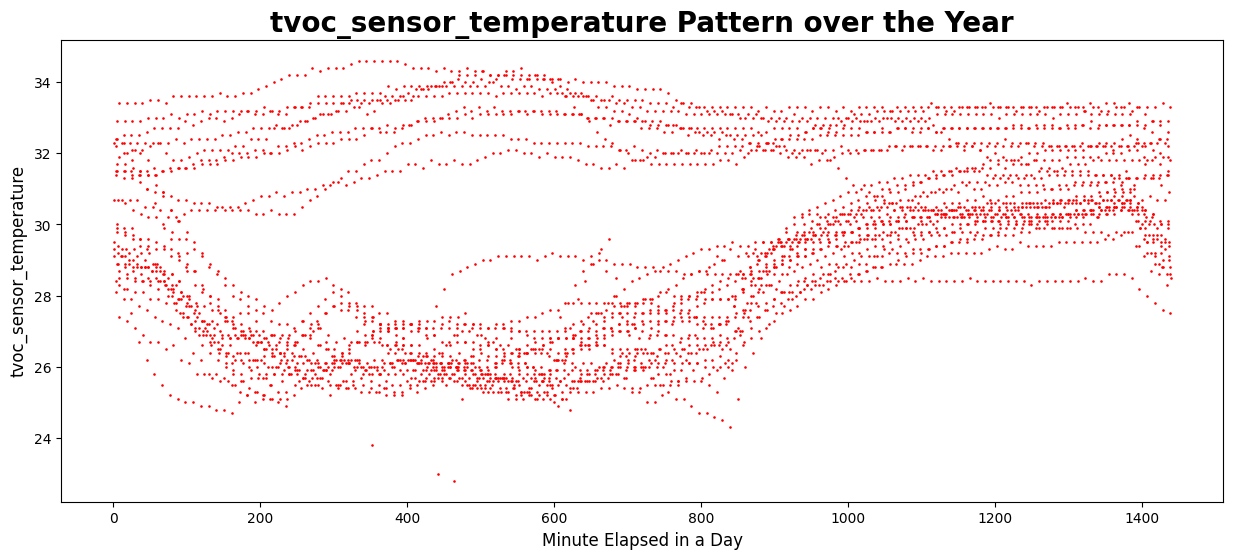

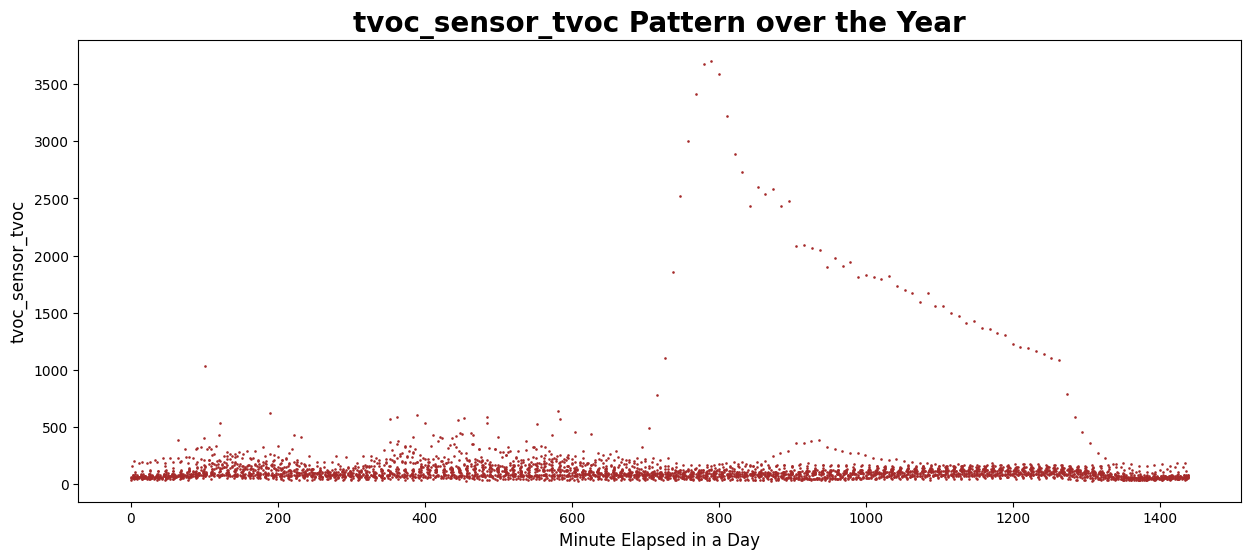

In [76]:
import json
from datetime import datetime
import matplotlib.pyplot as plt

def convert_seconds_to_datetime(seconds):
    # Convert seconds to a datetime variable for the year 2024
    seconds = int(seconds)
    datetime_object = datetime.fromtimestamp(seconds, timezone.utc)
    datetime_object_2024 = datetime_object.replace(year=2024)
    return datetime_object_2024


# Load JSON data
with open('new.json', 'r') as file:
    data = json.load(file)
data  = data ['device_01']
features = ['hcho_sensor','light_sensor','tvoc_sensor_co2','tvoc_sensor_rh','tvoc_sensor_temperature','tvoc_sensor_tvoc' ]
feature_colors = ['black', 'orange', 'blue', 'green', 'red', 'brown'] 
for i in range (len(features)): 

    # Extract x (minutes elapsed) and y (data from JSON)
    x_axis = []
    y_axis = []
    
    
    for seconds_data, sensor_data in data.items(): 
        datetime_object = convert_seconds_to_datetime(seconds_data)
        minutes_elapsed = (datetime_object - datetime_object.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds() / 60
        x_axis.append(minutes_elapsed)
        y_axis.append(sensor_data[features[i]])

        print (datetime_object) 
        print (minutes_elapsed)
        print (sensor_data[features[i]])


    #     y.append(y_data)
    fig, ax = plt.subplots(figsize = (15,6))
    # Create scatter plot
    ax.scatter(x_axis, y_axis, color=feature_colors[i], marker='.', s=3)
    ax.set_xlabel("Minute Elapsed in a Day", fontsize=12)
    ax.set_ylabel(features[i], fontsize=12)
    ax.set_title("{} Pattern over the Year".format(features[i]), fontsize=20,fontweight='bold')
    # ax.set_ybound(0, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)


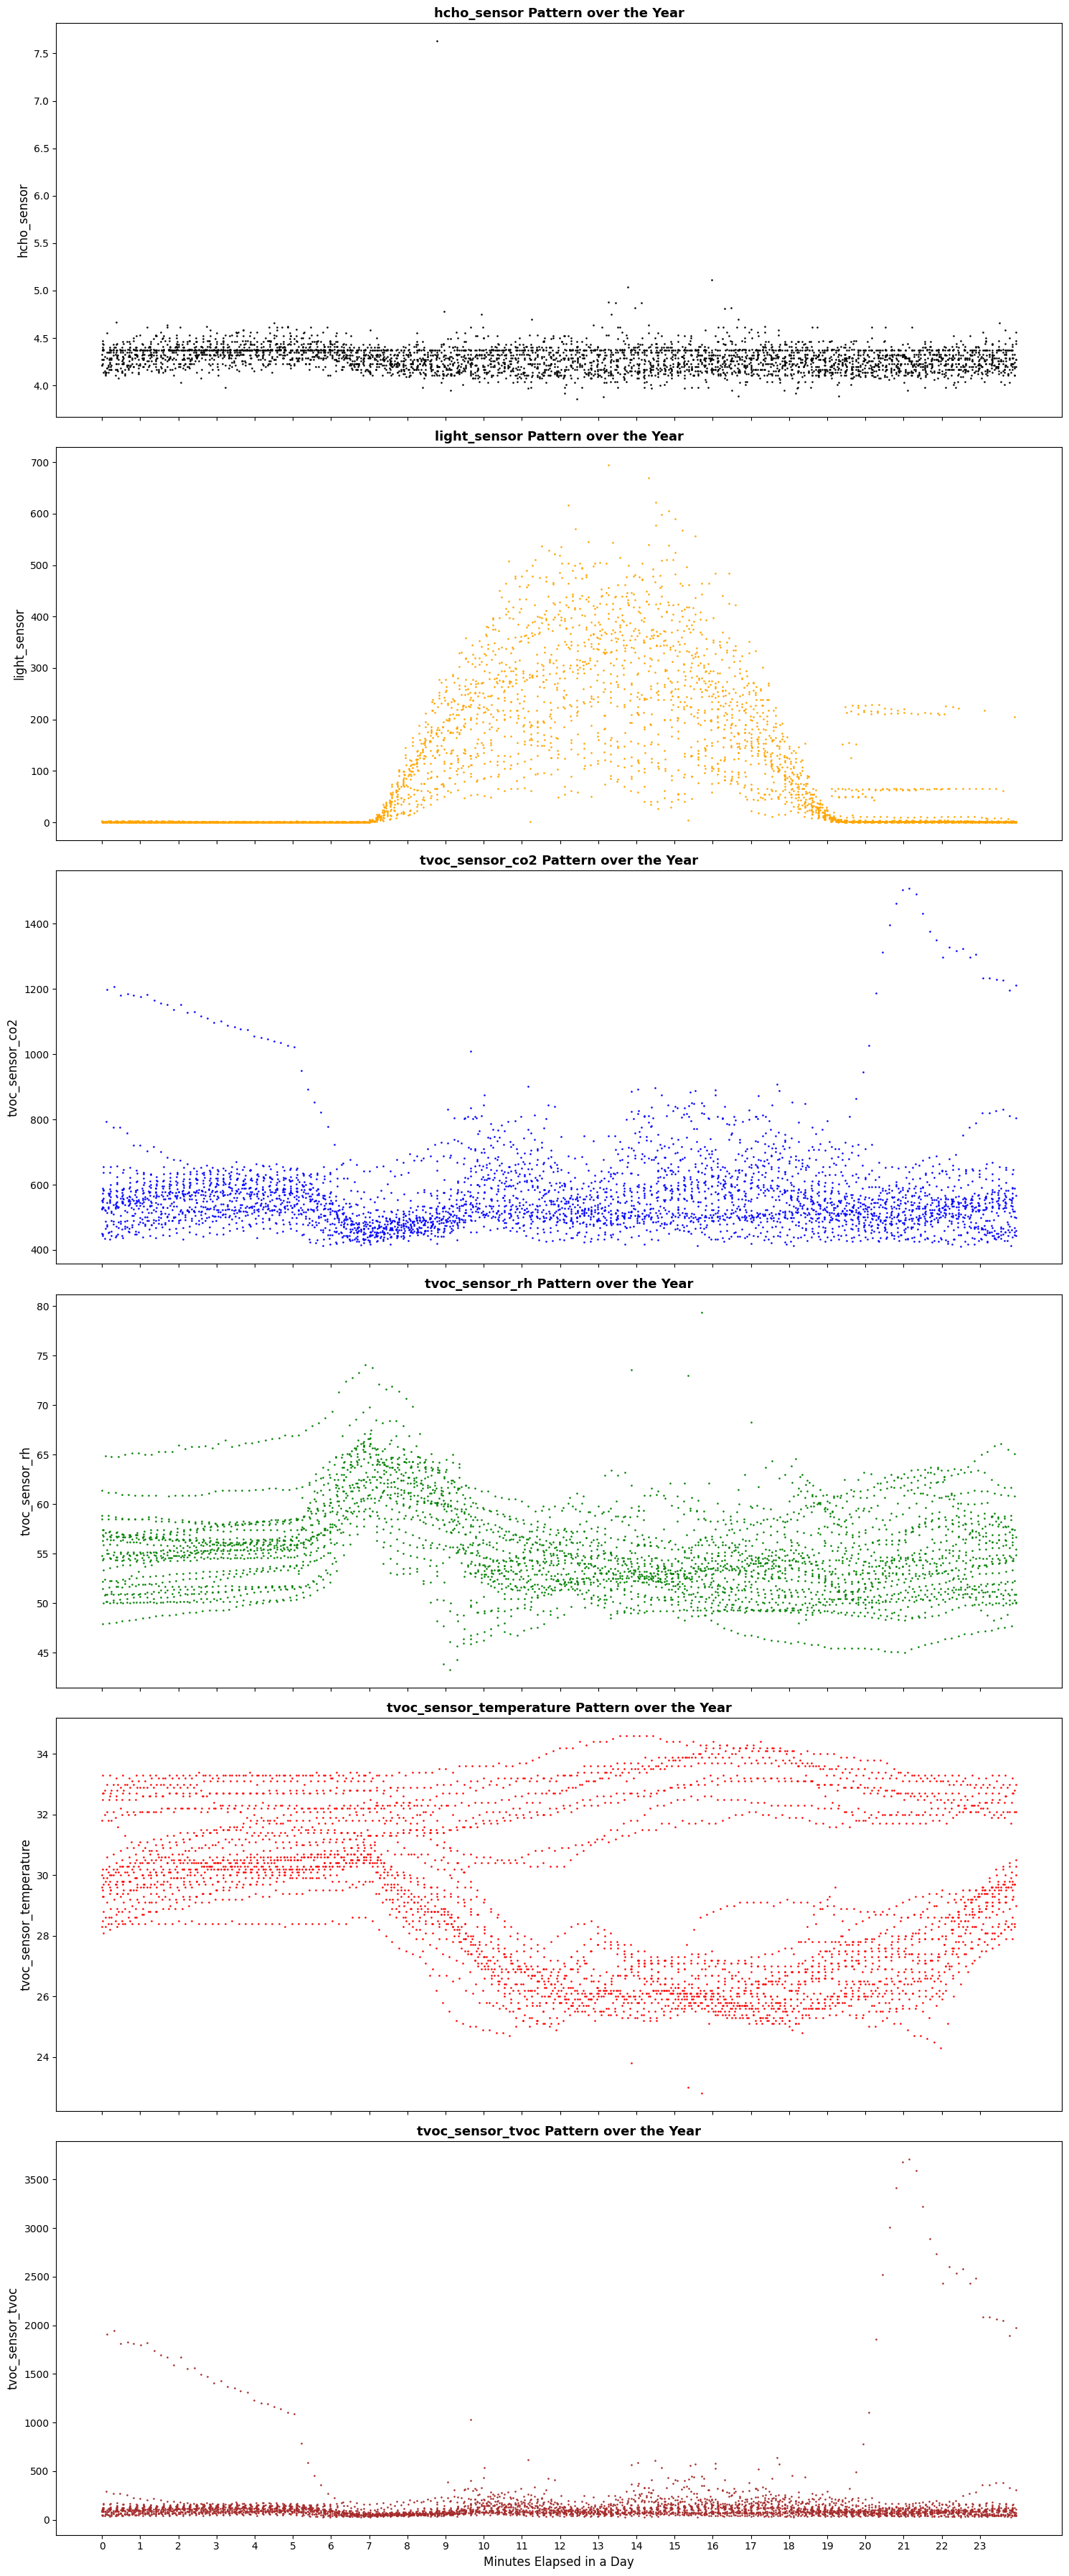

In [78]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load JSON data
with open('new.json', 'r') as file:
    data = json.load(file)
data = data['device_01']
features = ['hcho_sensor', 'light_sensor', 'tvoc_sensor_co2', 'tvoc_sensor_rh', 'tvoc_sensor_temperature', 'tvoc_sensor_tvoc']
feature_colors = ['black', 'orange', 'blue', 'green', 'red', 'brown']

fig, axs = plt.subplots(len(features), 1, figsize=(15, 6 * len(features)), sharex=True)

for i, feature in enumerate(features):
    x_axis = []
    y_axis = []

    for seconds_data, sensor_data in data.items():
        # Convert seconds to datetime object
        datetime_object = datetime.fromtimestamp(int(seconds_data))
        minutes_elapsed = datetime_object.hour * 60 + datetime_object.minute
        x_axis.append(minutes_elapsed)
        y_axis.append(sensor_data[feature])

    axs[i].scatter(x_axis, y_axis, color=feature_colors[i], marker='.', s=3)
    axs[i].set_ylabel(feature, fontsize=12)
    axs[i].set_title("{} Pattern over the Year".format(feature), fontsize=13, fontweight='bold')

# Set common xlabel and format xticks
axs[-1].set_xlabel("Minutes Elapsed in a Day", fontsize=12)
plt.xticks(range(0, 1440, 60), [str(x) for x in range(0, 24)])
plt.tight_layout()

plt.show()
